# k-Nearest Neighbor (kNN) assignment

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Mnist dataset 불러오기

In [2]:
from sklearn.datasets import fetch_openml

# load mnist data
mnist_data = fetch_openml('mnist_784')
X_data = mnist_data.data
Y_data = mnist_data.target.astype('int32')

# shuffling data
shuffle_mask = np.arange(X_data.shape[0])
np.random.shuffle(shuffle_mask)
X_data = X_data[shuffle_mask]
Y_data = Y_data[shuffle_mask]

# divide data : train, test data
X_train = X_data[:10000]
X_test = X_data[10000:11000]
Y_train = Y_data[:10000]
Y_test = Y_data[10000:11000]

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(10000, 784)
(1000, 784)
(10000,)
(1000,)


# Mnist 이미지 출력

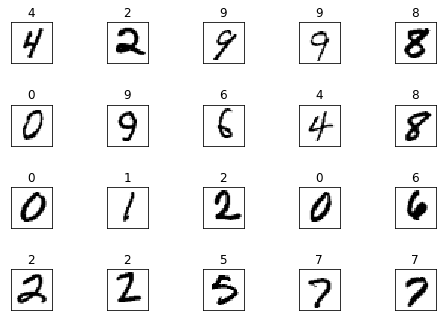

In [3]:
sample_X = X_train[:20]
sample_Y = Y_train[:20]

fig = plt.figure()
fig.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=1, hspace=1)
for i in range(20):
    subplot = fig.add_subplot(4, 5, i+1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.set_title('%d'%sample_Y[i])
    subplot.imshow(sample_X[i].reshape(28,28), cmap=plt.cm.gray_r)
plt.show()

# # Problem 1 (10 pts)
Test data(X_test)와 training data(X_train) 사이의 거리를 ***for loop를 두번 사용하여*** distance matrix(dist_mat)에 저장한 후 dist_mat을 return 하는 함수를 작성하시오.
- distance matrix(dist_mat) : numpy array of shape (test data 수, train data 수). (dist_mat[i,j] : i번째 test data와 j번째 train data 사이의 거리)
- 거리는 L2 distance로 구할 것.

In [4]:
def Problem_1(X_test, X_train):
    
    test_num = None
    train_num = None
    
    test_num = X_test.shape[0]
    train_num = X_train.shape[0]
    dist_mat = np.zeros((test_num, train_num))
    
    for i in range(test_num):
        for j in range(train_num):
            ############# Put your code here ################
            dist_mat[i,j] = np.linalg.norm(X_test[i]-X_train[j],ord=2)              
            #################################################
    return dist_mat

# # Problem 2 (20 pts)
Test data(X_test)와 training data(X_train) 사이의 거리를 ***for loop를 사용하지 않고 numpy 연산만을 이용하여*** distance matrix(dist_mat)에 저장한 후 dist_mat을 return 하는 함수를 작성하시오.
- L2 distance로 거리를 구할 것.

In [18]:
def Problem_2(X_test, X_train):
    
    test_num = None
    train_num = None
    
    test_num=X_test.shape[0]
    train_num=X_train.shape[0]
    
    dist_mat = np.zeros((test_num, train_num))
    ############# Put your code here ################

    dist_mat= np.reshape(np.sum(X_test**2, axis=1), [test_num,1]) + np.sum(X_train**2, axis=1)\
            - 2 * np.matmul(X_test,X_train.T)
    dist_mat= np.sqrt(dist_mat)
        
    #################################################        
    return dist_mat

# # Problem 3 (10 pts)
time 라이브러리를 이용하여 Problem_1, Problem_2 함수의 실행시간(초)을 측정한 후 비교하고, 두 함수에서 계산된 distance matrix가 같은 matrix임을 보이시오.

In [19]:
import time

dist_mat_two_loop = None
dist_mat_no_loop = None
problem1_time = None
problem2_time = None

############# Put your code here ################

def calculate_time_dist(f,*args):
    
    start=time.time()
    dists=f(*args)
    end=time.time()
    return end-start,dists


problem1_time,dist_mat_two_loop=calculate_time_dist(Problem_1,X_test, X_train)
problem2_time,dist_mat_no_loop=calculate_time_dist(Problem_2,X_test, X_train)
            
#################################################   


print('Problem1 (two for loop) execution time : %f'%problem1_time)
print('Problem2 (no for loop) execution time : %f'%problem2_time)

difference = np.linalg.norm(dist_mat_two_loop - dist_mat_no_loop, ord='fro')
if difference < 0.001:
    print('The distance matrices are the same')
else:
    print('The distance matrices are different')

Problem1 (two for loop) execution time : 52.386869
Problem2 (no for loop) execution time : 0.429087
The distance matrices are the same


# # Problem 4 (10 pts)
KNN 알고리즘으로 test 데이터의 label 값을 예측하여 return 해주는 함수를 만들고, 실제 label 값과 비교하여 예측의 정확도를 구하시오.
- 위에서 구한 distance matrix를 이용.
- k = 3

In [7]:
def Problem_4(dist_mat, k, Y_train):
    
    test_num = None
    test_num=dist_mat.shape[0]
    Y_predict = np.zeros(test_num)

    for i in range(test_num):
        ############# Put your code here ################
        Y_predict[i]=np.bincount(Y_train[np.argsort(dist_mat[i])][0:k]).argmax()
        #################################################   
    return Y_predict

y_pred = Problem_4(dist_mat_no_loop, 3, Y_train)
accuracy = None
############# Put your code here ################

accuracy=float((np.sum(y_pred==Y_test)))/(Y_test.shape[0])

#################################################
print('Test data prediction accuracy : %f'%accuracy)

Test data prediction accuracy : 0.949000


# # Problem 5 (20 pts)
training 데이터를 split 하여, 5 fold cross validation을 수행하고 최적의 hyper parameter K 를 찾으시오. 또한, cross validation 기법을 사용하는 이유를 조사한 후 간단히 서술하시오.
- numpy 외 다른 라이브러리 사용 금지.
- 위에서 정의한 함수들 이용.
- k_candidate list에 hyper parameter k 후보들을 저장. ex) k_candidate = [3, 5, 7, 10, 15]
- accuracy_dict[x]에 k = x 일때 5개의 validation accuracy 저장. ex) print(accuracy_dict[3]) -> [70.01, 68.93, 54.412, 65.643, 68.85]
- https://www.youtube.com/watch?v=OoUX-nOEjG0&list=PLC1qU-LWwrF64f4QKQT-Vg5Wr4qEE1Zxk&index=2 28분30초~39분30초 참고.

[Cross validation 사용 이유] 

1. 데이터셋이 부족할 경우 정확도를 향상시킬 수 있다.

   데이터를 여러번 나누어 모든 데이터셋을 validation set으로 활용하기 때문에 ,테스트셋을 어떻게 잡느냐에 따라 성능이 다르게 되는 모델 평가 지표 편향을 방지할 수 있다.


2. Overfitting 방지

	하나의 학습/검증 데이터로 이루어진 모델은 학습데이터에만 과적합되었을 가능성이 	높기 때문에 K-fold를 통해 일반화된 모델을 생성할 수 있다. 


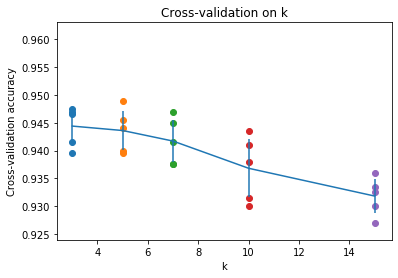

In [8]:
num_fold = 5
k_candidate = [3,5,7,10,15]
accuracy_dict = {}
X_train_folds = []
Y_train_folds = []
for k in k_candidate:
    accuracy_dict[k] = []

############# Put your code here ################

X_train_folds=np.array_split(X_train,num_fold)
Y_train_folds=np.array_split(Y_train,num_fold)

#################################################
for i in range(num_fold): 
    ############# Put your code here ################
    X_train_fold=np.concatenate([fold for j,fold in enumerate(X_train_folds) if i!=j])
    Y_train_fold=np.concatenate([fold for j,fold in enumerate(Y_train_folds) if i!=j])
            
    #################################################
    for k in k_candidate:
        ############# Put your code here ################       
    
        y_pred = Problem_4(Problem_2(X_train_folds[i],X_train_fold), k, Y_train_fold)        
        accuracy=float((np.sum(y_pred==Y_train_folds[i])))/(Y_train_folds[i].shape[0])
        accuracy_dict[k].append(accuracy)
                
        #################################################   

############ k-fold cross validation 그래프그리기 #################

for k in k_candidate:
    accuracies = accuracy_dict[k]
    plt.scatter([k] * len(accuracies), accuracies)
    
accuracies_mean = np.array([np.mean(v) for k,v in sorted(accuracy_dict.items())])
accuracies_std = np.array([np.std(v) for k,v in sorted(accuracy_dict.items())])
plt.errorbar(k_candidate, accuracies_mean, yerr=accuracies_std)
plt.title('Cross-validation on k')
plt.xlabel('k')
plt.ylabel('Cross-validation accuracy')
plt.show()


# #Problem 6 (10 pts)
Problem5 에서 구한 best hyperparameter k와 Problem4에서 작성한 함수를 이용하여 test 데이터의 label 값을 예측하고, 정확도를 구하시오.

In [9]:
best_k =k_candidate[accuracies_mean.argmax()]

y_pred = Problem_4(dist_mat_no_loop, best_k, Y_train)
accuracy = None
############# Put your code here ################
accuracy=float((np.sum(y_pred==Y_test)))/(Y_test.shape[0])
#################################################   
print('Test data prediction accuracy : %f'%accuracy)

Test data prediction accuracy : 0.949000


# #Problem 7 (20 pts)
Problem5, Problem6의 과정을 Scikit-learn 라이브러리를 이용하여 수행하시오.
- sklearn.neighbors.KNeighborsClassifier, sklearn.model_selection.cross_val_score 함수 사용법을 구글링 해볼 것.

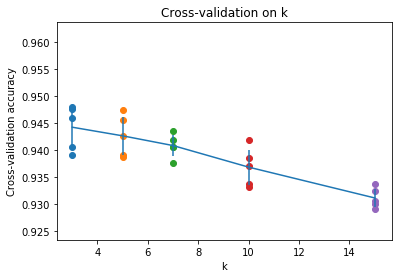

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

k_candidate = [3,5,7,10,15]
accuracy_dict = {}
for k in k_candidate:
    accuracy_dict[k] = []

for k in k_candidate:
    ############# Put your code here ################
    knn=KNeighborsClassifier(n_neighbors=k)
    accuracy=list(cross_val_score(knn,X_train,Y_train,cv=num_fold))
    accuracy_dict[k]=accuracy
    #################################################   
    
for k in k_candidate:
    accuracies = accuracy_dict[k]
    plt.scatter([k] * len(accuracies), accuracies)
    
accuracies_mean = np.array([np.mean(v) for k,v in sorted(accuracy_dict.items())])
accuracies_std = np.array([np.std(v) for k,v in sorted(accuracy_dict.items())])
plt.errorbar(k_candidate, accuracies_mean, yerr=accuracies_std)
plt.title('Cross-validation on k')
plt.xlabel('k')
plt.ylabel('Cross-validation accuracy')
plt.show()

In [11]:
best_k =k_candidate[accuracies_mean.argmax()]

y_pred =None
accuracy = None
############# Put your code here ################

y_pred =(KNeighborsClassifier(n_neighbors=best_k).fit(X_train,Y_train)).predict(X_test)
accuracy=float((np.sum(y_pred==Y_test)))/float(Y_test.shape[0])

#################################################   
print('Test data prediction accuracy : %f'%accuracy)

Test data prediction accuracy : 0.949000


# #Problem 8 (50 pts)
Numpy Library만 사용하여 MLP(one hidden layer)를 사용하는 Softmax Classifier를 만드시오.
- 입력된 텐서의 원 핫 인코딩된 값을 result에 저장한 후 result를 return하는 함수(one_hot_encoding) 만들시오.  
   [n,] -> [n,class_]
- 입력된 텐서의 softmax값을 result에 저장한 후 result를 return하는 함수(softmax_func)를 만들시오.  
   [n,10] -> [n,10]
- 입력된 텐서를 MLP에 통과시켜 예측값을 result에 저장한 후 result를 return하는 함수(forward)를 만들시오.   
   [n,784],[784,hidden_node],[hidden_node,10] -> [n,10]
- MLP의 Weights의 gradient를 계산하여 w1_grad,w2_grad에 저장한 후 w1_grad,w2_grad를 return하는 함수(gradient) 만들시오.    
   [n,784],[784,hidden_node],[hidden_node,10],[n,10],[n,10] -> [784,hidden_node],[hidden_node,10]
- Test Accuracy가 90%가 넘는 hyperparameter(hidden node 개수, learning rate, epoch 수)를 찾아내시오.
- Numpy Library외 사용금지 
- MLP의 Hidden Layer의 activation function은 ReLU함수를 사용할 것.
- Loss Function은 Cross-Entropy를 사용할 것.


In [20]:
from sklearn.metrics import accuracy_score
#Relu 함수
ReLU = lambda x:np.maximum(0.0,x)
#Relu의 Derivate 구해주는 함수
dReLU = lambda x:np.float32(x>0.0)

#원핫 인코딩
def one_hot_encoding(y,class_=10):
    result=np.ones((y.shape[0],class_))
    
    ############# Put your code here ################
    result=np.eye(class_)[y]
    #################################################
    
    return result


def softmax_func(x_data):  
    result = np.ones(x_data.shape) 
    
    ############# Put your code here ################
    
    x_data-=np.max(x_data,axis=1,keepdims=True)
    score_exp=np.exp(x_data)
    result=score_exp/np.sum(score_exp,axis=1,keepdims=True)

    #################################################
    
    return result


def forward(x,w1,w2):  
    result = np.ones((x.shape[0],10)) #(10000,10)
    
    ############# Put your code here ################
        
    fc1=x.dot(w1)
    x2=ReLU(fc1)
    fc2=x2.dot(w2)
    result=softmax_func(fc2)
    
    #################################################
    
    return result


def gradient(x,w1,w2,y_true,y_pred):
    w1_grad = np.ones(w1.shape)
    w2_grad = np.ones(w2.shape)
    
    ############# Put your code here ################    
    diff=y_pred-y_true
    fc1=np.dot(x,w1)
    act=ReLU(fc1)
    
    ## w2 gradient
    w2_grad=np.dot(act.T,diff)/act.shape[0]
    
    ## w1 gradient
    w1_grad=np.dot(x.T,np.dot(diff,w2.T)*dReLU(fc1))/fc1.shape[0]    
    #################################################
    
    return w1_grad, w2_grad


class Model():
    def __init__(self, input_shape, hidden_shape, output_shape,learning_rate):
        #initialize weights
        self.W1 = np.random.normal(0.0, input_shape**(-1/2), (input_shape,hidden_shape))
        self.W2 = np.random.normal(0.0, hidden_shape**(-1/2), (hidden_shape,output_shape))
        self.lr = learning_rate
    def train(self,epoch,X_train,Y_train):
        for i in range(epoch):
            Y_pred = forward(X_train,self.W1,self.W2)
            W1_grad , W2_grad = gradient(X_train,self.W1,self.W2,Y_train,Y_pred)
            self.W1 -= self.lr*W1_grad 
            self.W2 -= self.lr*W2_grad
    def predict(self,X_test):
        Y_pred = forward(X_test,self.W1,self.W2)
        return Y_pred

    
#Prepare & Normalize Data
X_train = X_data[:10000]
X_test = X_data[10000:11000]
Y_train = Y_data[:10000]
Y_test = Y_data[10000:11000]
Y_train_enc = one_hot_encoding(Y_train,10)

X_train = X_train/255
X_test = X_test/255


#Initialize Model and train

# hidden=128 /epoch=120 /lr=0.5

############# hyperparemter tuning ################
my_model = Model(784, hidden_shape = 128, output_shape = 10, learning_rate = 0.5)
my_model.train(epoch = 120, X_train = X_train, Y_train = Y_train_enc)
###################################################

print('Your score on test dataset :',accuracy_score(np.argmax(my_model.predict(X_test),axis=1),Y_test))

Your score on test dataset : 0.917
